># Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,resting blood pressure, serum cholesterol, and maximum heart rate achieved.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')

In [14]:
data = pd.read_csv('dataset.csv')

># Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
data.shape

(303, 14)

In [20]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

># Q2. Split the dataset into a training set (70%) and a test set (30%).

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

># Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=10)

In [24]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

># Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
print(f'Accuracy: {accuracy_score(y_test,y_pred)}')

Accuracy: 0.8241758241758241


In [28]:
print(f'Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Confusion Matrix:
 [[32 12]
 [ 4 43]]


In [29]:
print(f'Classification Report:\n {classification_report(y_test,y_pred)}')

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        44
           1       0.78      0.91      0.84        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



># Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [30]:
print('Top five most important features:')
important_features = pd.DataFrame({'feature_names':model.feature_names_in_,'feature_scores':model.feature_importances_})
top_5 = important_features.sort_values(by='feature_scores',ascending=False)[0:5]
top_5

Top five most important features:


,feature_names,feature_scores
9,oldpeak,0.132528
2,cp,0.127514
7,thalach,0.122573
11,ca,0.108431
12,thal,0.104129


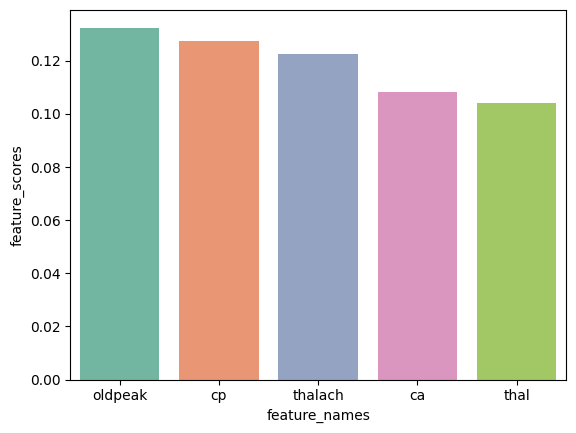

In [31]:
sns.barplot(x=top_5.feature_names,y=top_5.feature_scores,palette='Set2')
plt.show()

># Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

## `GridSearchCV`

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameters = {
    'n_estimators': [100,200],
    'max_depth': [5,6,7,8,9,10],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3]
}

In [34]:
grid_model = GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=5)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [35]:
grid_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [36]:
grid_model.score(X_test,y_test)

0.8241758241758241

## `RandomizedSearchCV`

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
random_model = RandomizedSearchCV(model,param_distributions=parameters,n_iter=10,cv=5,scoring='accuracy')
random_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [100, 200]},
                   scoring='accuracy')

In [39]:
random_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_depth': 6}

In [40]:
random_model.score(X_test,y_test)

0.8351648351648352

># Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

## `GridSearchCV_best_params_`

In [41]:
grid_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [42]:
y_pred = grid_model.predict(X_test)

In [43]:
print(f'Accuracy: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')
print(f'Classification Report:\n {classification_report(y_test,y_pred)}')

Accuracy: 0.8241758241758241
Confusion Matrix:
 [[33 11]
 [ 5 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



> # The performance of GridSearchCV model is quite low as compared to default model which is good to reduce overfitting.

## `RandomizedSarchCV_best_params_`

In [44]:
random_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_depth': 6}

In [45]:
y_pred = random_model.predict(X_test)

In [46]:
print(f'Accuracy: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')
print(f'Classification Report:\n {classification_report(y_test,y_pred)}')

Accuracy: 0.8351648351648352
Confusion Matrix:
 [[32 12]
 [ 3 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81        44
           1       0.79      0.94      0.85        47

    accuracy                           0.84        91
   macro avg       0.85      0.83      0.83        91
weighted avg       0.85      0.84      0.83        91



> # The performance of RandomSearchCV model is also quite good as compared to default model. And,also the performance of RandomSearchCV is quite high as compared to GridSearchCV.

># Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

## To interpret the model by analyzing the decision boundaries of the random forest classifier, we first need to select two of the most important features. We have `'cp' (chest pain type)` and `'oldpeak' (ST depression induced by exercise relative to rest)` as the two most important features for predicting heart disease risk.
## We can plot a scatter plot of 'cp' versus 'oldpeak' and color the points based on their predicted class label using the random forest classifier. This will allow us to visualize the decision boundaries of the classifier on this feature space.

In [139]:
X = np.array(data[['cp','oldpeak']])
y = np.array(data['target'])

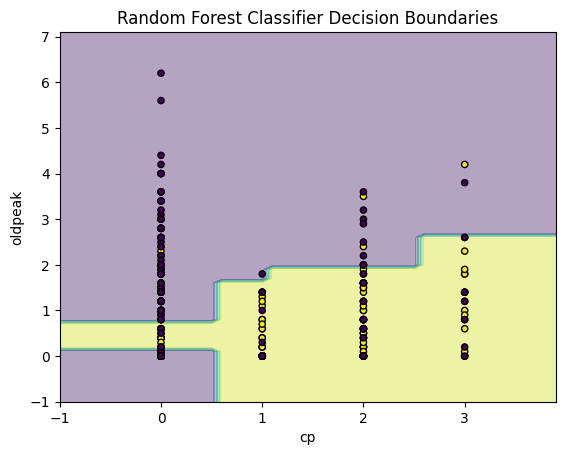

In [163]:
# Training a random forest classifier on the selected columns and parameter are taken from RandomizedSearchCV best_params_
classifier = RandomForestClassifier(n_estimators= 200, min_samples_split= 3, min_samples_leaf= 3, max_depth= 6, random_state=0)
classifier.fit(X, y)

# Ploting the decision boundaries on a scatter plot of the two most important features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('cp')
plt.ylabel('oldpeak')
plt.title('Random Forest Classifier Decision Boundaries')
plt.show()

## Now, we can look at the decision boundaries and see how the classifier separates the data points into different classes. We can observe that the decision boundaries are not linear and are rather complex and nonlinear. The random forest classifier has learned to make a complex set of decisions based on the combination of these two features and other features as well.
## The insights provided by the model are that 'cp' and 'oldpeak' are important predictors of heart disease risk, but other factors also play a role. The model also captures the nonlinear relationship between these features and heart disease risk, which is not captured by linear models.

## However, the limitations of the model are that it may not generalize well to unseen data. The model may have overfit the training data, meaning that it has learned to fit the noise in the training data as well as the underlying patterns. This can lead to poor performance on new, unseen data. Additionally, the model may not capture all the relevant factors that influence heart disease risk. For example, genetics, lifestyle, and other medical conditions may also play a role, which are not captured by this model. Therefore, it is important to use this model in conjunction with other methods and medical expertise to assess the risk of heart disease accurately.